In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/data_car.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## EDA

In [3]:
data.shape

(11914, 16)

In [4]:
data.head().style.background_gradient(cmap = 'copper')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.000000,6.000000,MANUAL,rear wheel drive,2.000000,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.000000,6.000000,MANUAL,rear wheel drive,2.000000,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.000000,6.000000,MANUAL,rear wheel drive,2.000000,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.000000,6.000000,MANUAL,rear wheel drive,2.000000,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.000000,6.000000,MANUAL,rear wheel drive,2.000000,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
data.describe().style.background_gradient(cmap = 'ocean')

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.000000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,249.386070,5.628829,3.436093,26.637485,19.733255,1554.911197,40594.737032
std,7.579740,109.191870,1.780559,0.881315,8.863001,8.987798,1441.855347,60109.103604
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2000.000000
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,21000.000000
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,29995.000000
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,42231.250000
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2065902.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [9]:
# Create a plot using plotly.express
fig = px.scatter(data, x='Year', y='MSRP', color='Make', title='Car Prices by Year')

# Display the plot
fig.show()

In [10]:
# Count the number of cars by year
car_counts = data['Year'].value_counts().sort_index()

# Create a line plot of car count by year
fig = px.bar(x=car_counts.index, y=car_counts.values,
              labels={'x': 'Year', 'y': 'Car Count'},
              title='Car Count by Year')
              
fig.show()

**Observation:**

Car count drastically increased from 2015

In [11]:
# Count the number of cars by year
car_counts = data['Year'].value_counts().sort_index()

# Create a line plot of car count by year
fig = px.line(x=car_counts.index, y=car_counts.values,
              labels={'x': 'Year', 'y': 'Car Count'},
              title='Car Count by Year')
              
fig.show()

In [12]:
fig = px.bar(data, x='Year', y='MSRP', color='Transmission Type', title='Car Types by Year')
fig.show()

In [13]:
# Count the number of cars by transmission type
transmission_counts = data['Transmission Type'].value_counts()

# Create a bar plot using plotly.express
fig = px.bar(x=transmission_counts.index, y=transmission_counts.values,
             labels={'x': 'Transmission Type', 'y': 'Count'},
             title='Number of Cars by Transmission Type')

fig.show()

**Observation:**

Most of the customesrs use Automatic

In [14]:
# Count the number of cars for each fuel type
fuel_counts = data['Engine Fuel Type'].value_counts()

# Create a bar plot using plotly.express
fig = px.bar(x=fuel_counts.index, y=fuel_counts.values,
             labels={'x': 'Fuel Type', 'y': 'Count'},
             title='Number of Cars by Fuel Type')
fig.show()

**Observation:**

Most of the vehicles use Regular unleaded fuel

In [15]:

# Create a scatter plot using plotly express
fig = px.scatter(data, x='Popularity', y='Transmission Type', color='Transmission Type',
                 title='Popularity vs. Transmission Type')

# Display the plot
fig.show()

In [16]:
# Create a scatter plot using plotly.express
fig = px.scatter(data, x='Popularity', y='Driven_Wheels', color='Driven_Wheels',
                 title='Cars: Popularity vs Driven Wheels')

# Display the plot
fig.show()

In [17]:
grouped_data = data.groupby(['Popularity', 'Driven_Wheels']).size().reset_index(name='Count')

# Create a pie chart using plotly.express
fig = px.pie(grouped_data, values='Count', names='Driven_Wheels', 
             title='Cars: Distribution of Driven Wheels by Popularity')

# Display the plot
fig.show()

In [18]:
# Count the number of vehicles by type
vehicle_type_counts = data['Vehicle Style'].value_counts()

# Create a pie chart using plotly.express
fig = px.pie(vehicle_type_counts, values=vehicle_type_counts.values, names=vehicle_type_counts.index,
             title='Distribution of Vehicle Types')

# Display the plot
fig.show()

**Observation:**

Sedan is the most bought or most common type of vehicle that people prefer and the least bought is convertible suv


<Axes: >

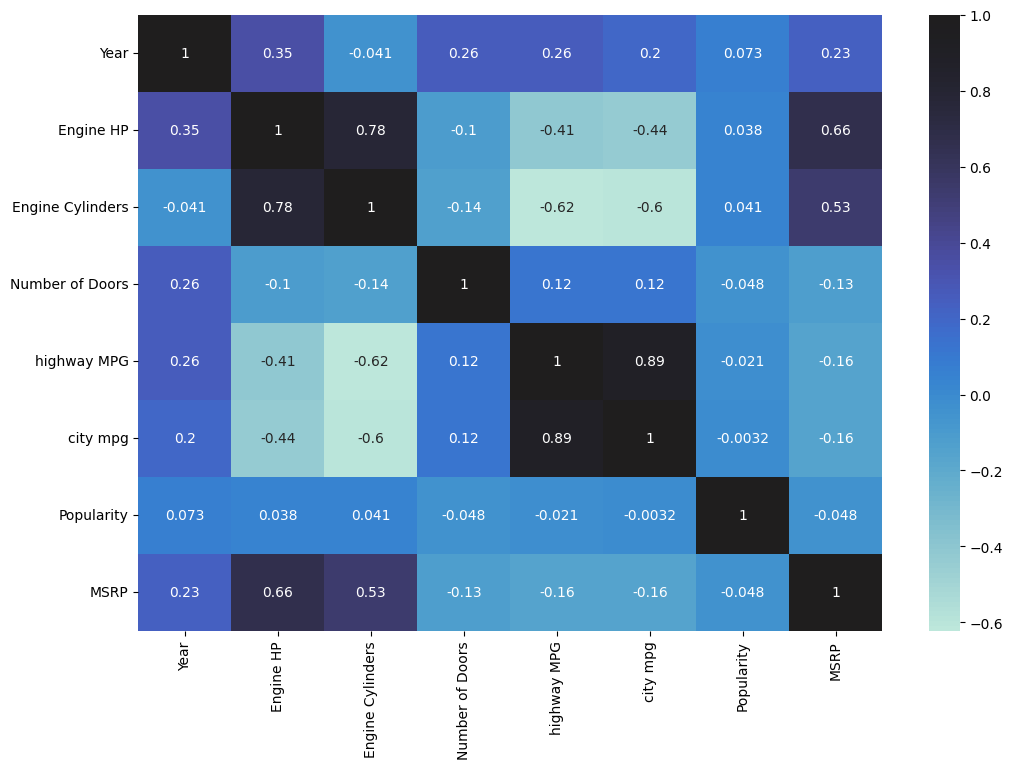

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(data, columns=data.columns).corr(), annot=True, center=True)

In [20]:
# Create a correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using plotly
fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                               x=correlation_matrix.columns,
                               y=correlation_matrix.columns,
                               colorscale='YlGnBu'))

# Set the title of the heatmap
fig.update_layout(title='Correlation Heatmap')

# Add text annotations to display the correlation values
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=f'{value:.2f}',
            showarrow=False,
            font=dict(color='white' if abs(value) > 0.5 else 'black')
        )

# Adjust the heatmap's appearance
fig.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_tickangle=45
)

# Display the heatmap
fig.show()

## Pre-processing

In [21]:
# Check unique values in categorical columns
print(data['Make'].unique())
print(data['Model'].unique())
print(data['Engine Fuel Type'].unique())

['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti' '626' '62' '65

In [22]:
# Select numerical columns
numerical_columns = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

# Create box plots for each numerical column
for column in numerical_columns:
    fig = go.Figure()
    fig.add_trace(go.Box(y=data[column], name=column, boxpoints='outliers'))
    fig.update_layout(title=f'Box Plot - {column}', yaxis_title=column)
    fig.show()

Treating outliers

In [23]:
for i in ['Year','Engine HP','highway MPG','city mpg','Popularity','MSRP']:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    data[i].where(data[i] > lower_limit, lower_limit, inplace = True)
    data[i].where(data[i] < upper_limit, upper_limit, inplace = True)

Remoning Null Values

In [24]:
# Count the number of electric cars
electric_count = data[data['Engine Fuel Type'] == 'electric'].shape[0]

# Display the count
print("Number of Electric Cars:", electric_count)

Number of Electric Cars: 66


In [25]:
# Filter the dataset to include only electric cars
electric_cars = data[data['Engine Fuel Type'] == 'electric']

# Check for missing values in the filtered dataset
missing_values = electric_cars.isnull().sum()

# Display the missing values count
print("Missing Values in Electric Cars:")
print(missing_values)

Missing Values in Electric Cars:
Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP             0
Engine Cylinders     10
Transmission Type     0
Driven_Wheels         0
Number of Doors       5
Market Category       5
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64


In [26]:
# Filter the dataset to include only electric cars
electric_cars = data[data['Engine Fuel Type'] == 'electric']

# Create a new dataframe with the values of electric cars
electric_cars_df = pd.DataFrame(electric_cars)



In [27]:
electric_cars_df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015.0,electric,-25.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,42,31,819,31800.0
540,FIAT,500e,2016.0,electric,-25.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,42,31,819,31800.0
541,FIAT,500e,2017.0,electric,-25.0,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,42,31,819,31800.0
1680,Mercedes-Benz,B-Class Electric Drive,2015.0,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,42,31,617,41450.0
1681,Mercedes-Benz,B-Class Electric Drive,2016.0,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,42,31,617,41450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,Chevrolet,Spark EV,2014.0,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,42,31,1385,27010.0
9869,Chevrolet,Spark EV,2015.0,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,42,31,1385,25170.0
9870,Chevrolet,Spark EV,2015.0,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,42,31,1385,25560.0
9871,Chevrolet,Spark EV,2016.0,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,42,31,1385,25510.0


In [28]:
# Find the maximum value of Engine Cylinders in electric_cars_df
median_HP = electric_cars_df['Engine HP'].median()

# Display the maximum value
print("median Engine HP:", median_HP)

median Engine HP: -25.0


Treating the missing values of in the Engine Cylinders & Engine HP of electric vehicles and non electric vehicles seperately

In [29]:
# Filter the dataset to include only electric vehicles
electric_vehicles = data[data['Engine Fuel Type'] == 'electric']

# Calculate the median HP of electric vehicles
electric_hp_median = electric_vehicles['Engine HP'].median()

# Fill missing values in Engine Cylinders and Engine HP columns for electric vehicles
electric_vehicles['Engine Cylinders'].fillna(0, inplace=True)
electric_vehicles['Engine HP'].fillna(electric_hp_median, inplace=True)

# Fill missing values in Engine Cylinders and Engine HP columns for non-electric vehicles
non_electric_vehicles = data[data['Engine Fuel Type'] != 'electric']
non_electric_cylinders_median = non_electric_vehicles['Engine Cylinders'].median()
non_electric_hp_median = non_electric_vehicles['Engine HP'].median()

non_electric_vehicles['Engine Cylinders'].fillna(non_electric_cylinders_median, inplace=True)
non_electric_vehicles['Engine HP'].fillna(non_electric_hp_median, inplace=True)

# Update the original dataset with the modified values
data.update(pd.concat([electric_vehicles, non_electric_vehicles]))


In [30]:
# Fill missing values in 'Engine Fuel Type' with the most common value
data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0], inplace=True)

# Fill missing values in 'Number of Doors' with the most common value
data['Number of Doors'].fillna(data['Number of Doors'].mode()[0], inplace=True)

# Fill missing values in 'Market Category' with 'Unknown'
data['Market Category'].fillna('Unknown', inplace=True)

data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011.0,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135.0
1,BMW,1 Series,2011.0,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650.0
2,BMW,1 Series,2011.0,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350.0
3,BMW,1 Series,2011.0,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450.0
4,BMW,1 Series,2011.0,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500.0


# Encoding and Scaling

In [31]:
X = data.drop(['Popularity', 'city mpg','highway MPG','Number of Doors'], axis=1)
y = data['MSRP']

Dropped the following features['Popularity', 'city mpg','highway MPG','Number of Doors'] because it had less corelation with msrp

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [33]:
# Select the categorical features to encode
categorical_features = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels',
                        'Market Category', 'Vehicle Size', 'Vehicle Style']

# Perform one-hot encoding with drop_first=True to avoid the dummy variable trap
encoded_data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Display the encoded dataset
encoded_data.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Alfa Romeo,Make_Aston Martin,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011.0,335.0,6.0,2.0,26,19,3916,46135.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011.0,300.0,6.0,2.0,28,19,3916,40650.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011.0,300.0,6.0,2.0,28,20,3916,36350.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011.0,230.0,6.0,2.0,28,18,3916,29450.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011.0,230.0,6.0,2.0,28,18,3916,34500.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
encoded_data.shape

(11914, 1073)

# Checking accuracy with models

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_data, y, test_size=0.2, random_state=42)

In [36]:
# Perform feature scaling if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Import the machine learning algorithm
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the model
model = RandomForestRegressor()

# Define the parameter grid for random search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform random search cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=3)
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Reinitialize the model with the best hyperparameters
model_tuned = RandomForestRegressor(**best_params)

# Train the tuned model
model_tuned.fit(X_train_scaled, y_train)

# Make predictions on the test set using the tuned model
y_pred_tuned = model_tuned.predict(X_test_scaled)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score:", accuracy)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# Define the parameter distributions for random search
param_distributions = {
    'C': uniform(loc=0, scale=10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the logistic regression model
model = LogisticRegression()

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(model, param_distributions, cv=5, n_iter=10)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Reinitialize the logistic regression model with the best hyperparameters
model_tuned = LogisticRegression(**best_params)

# Train the tuned model
model_tuned.fit(X_train, y_train)

# Make predictions on the test set using the tuned model
y_pred_tuned = model_tuned.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_tuned)

print("Accuracy Score:", accuracy)


 I could not try rest of the accuracy scores , Anova, Resampling, fine tuning etc because of time constraints 